In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd

In [13]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [15]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [17]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [20]:
inspector = inspect(engine)

# Exploratory Climate Analysis

In [21]:

print(inspector.get_table_names())

['measurement', 'station']


In [22]:
measure_columns=inspector.get_columns('measurement')

for mcol in measure_columns:
    print(mcol['name'], mcol["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [23]:
station_columns=inspector.get_columns('station')
for scol in station_columns:
    print(scol['name'], scol["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [24]:

engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [25]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [26]:
results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.date.desc()).all()

results

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

In [33]:
results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.date).all()

results

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2725, 'USC00513117', '2010-01-01', 0.28, 67.0),
 (9008, 'USC00518838', '2010-01-01', 0.21, 72.0),
 (9519, 'USC00519523', '2010-01-01', 0.15, 75.0),
 (12188, 'USC00519281', '2010-01-01', 0.15, 70.0),
 (14960, 'USC00511918', '2010-01-01', 0.05, 66.0),
 (16939, 'USC00516128', '2010-01-01', 0.14, 73.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (2726, 'USC00513117', '2010-01-02', 0.0, 65.0),
 (9009, 'USC00518838', '2010-01-02', 0.02, 73.0),
 (9520, 'USC00519523', '2010-01-02', 0.0, 75.0),
 (12189, 'USC00519281', '2010-01-02', 0.0, 62.0),
 (14961, 'USC00511918', '2010-01-02', 0.0, 70.0),
 (16940, 'USC00516128', '2010-01-02', 0.0, 61.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (2727, 'USC00513117', '2010-01-03', 0.0, 75.0),
 (9010, 'USC00518838', '2010-01-03', 0.0, 67.0),
 (9521, 'USC00519523', '2010-01-03', 0.0, 77.0),
 (12190, 'USC00519281', '2010-01-03', 0.0, 74.0),
 (14962, 'USC00511918', '2010-01-03', 0.0, 75.0),
 (16941, 'USC

In [27]:
measure_id = [result[0] for result in results]
measure_station = [(result[1]) for result in results]
measure_date = [(result[2]) for result in results]
measure_prcp = [(result[3]) for result in results]
measure_tobs = [(result[4]) for result in results]

In [28]:

measure_date_dt = pd.to_datetime(measure_date, format= "%Y/%m/%d")

In [29]:

measure_df = pd.DataFrame({"Id":measure_id, "Date":measure_date_dt, "Station":measure_station, "Prcp":measure_prcp, "Temp": measure_tobs}, index=measure_date_dt)

In [30]:
measure_df_index = measure_df[measure_df.Date.isin(pd.date_range(start='2016-08-21',end='2017-08-23'))]
measure_df_index

,Id,Date,Station,Prcp,Temp
2017-08-23,2724,2017-08-23,USC00519397,0.00,81.0
2017-08-23,7635,2017-08-23,USC00514830,0.00,82.0
2017-08-23,12187,2017-08-23,USC00519523,0.08,82.0
2017-08-23,19550,2017-08-23,USC00516128,0.45,76.0
2017-08-22,2723,2017-08-22,USC00519397,0.00,82.0
2017-08-22,12186,2017-08-22,USC00519523,0.00,82.0
2017-08-22,19549,2017-08-22,USC00516128,0.50,76.0
2017-08-21,2722,2017-08-21,USC00519397,0.00,81.0
2017-08-21,7634,2017-08-21,USC00514830,0.02,79.0
2017-08-21,12185,2017-08-21,USC00519523,NaN,82.0


![precipitation](Images/precipitation.png)

In [34]:

measure_df_index[["Date","Prcp"]]

,Date,Prcp
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.08
2017-08-23,2017-08-23,0.45
2017-08-22,2017-08-22,0.00
2017-08-22,2017-08-22,0.00
2017-08-22,2017-08-22,0.50
2017-08-21,2017-08-21,0.00
2017-08-21,2017-08-21,0.02
2017-08-21,2017-08-21,NaN


C:\Users\osalvare\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


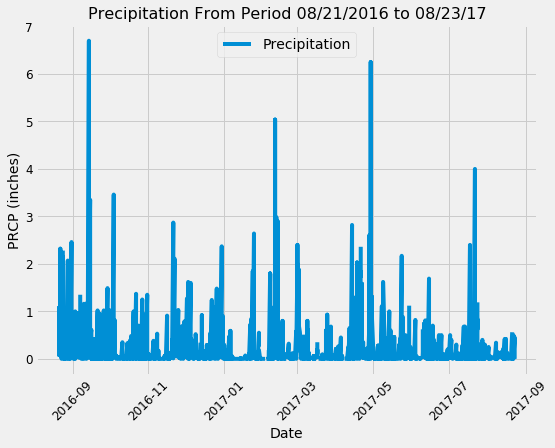

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(measure_df_index["Date"],measure_df_index["Prcp"])

ax.set_xlabel("Date", size= 14)
ax.set_ylabel("PRCP (inches)", size = 14)
ax.set_title("Precipitation From Period 08/21/2016 to 08/23/17", size= 16)
plt.xticks(rotation=45, size= 12)
plt.yticks(size= 12)
plt.legend(["Precipitation"],loc= 'upper center')

plt.show()

In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data

measure_df_index[['Prcp']].describe()

,Prcp
count,2031.000000
mean,0.179985
std,0.463894
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [40]:
# Design a query to show how many stations are available in this dataset?
number_stations = session.query(Measurement.station).distinct().count()
print(number_stations)


9


In [48]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_station = engine.execute(
                    '''
                    SELECT measurement.station, COUNT(measurement.station)
                    FROM measurement
                    GROUP BY measurement.station
                    ORDER BY COUNT(measurement.station) DESC;
                    ''').fetchall()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
engine.execute('''
                SELECT  MIN(measurement.tobs), Max(measurement.tobs), AVG(measurement.tobs)
                FROM measurement
                WHERE measurement.station = 'USC00519281';
                ''').fetchall()

[(54.0, 85.0, 71.66378066378067)]

In [51]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_temp_observ = engine.execute('''
                SELECT measurement.tobs, measurement.date
                FROM measurement
                WHERE measurement.date > '2016-08-21' AND measurement.station = 'USC00519281';''').fetchall()

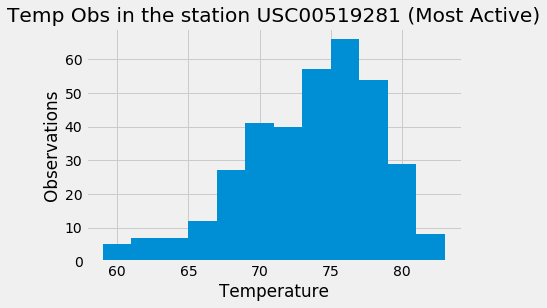

In [53]:
temp_observ_df = pd.DataFrame(most_temp_observ, columns = ['Temperature', 'Date'])
plt.hist(temp_observ_df['Temperature'], bins=12)


plt.xlabel('Temperature')
plt.ylabel('Observations')
plt.title('Temp Obs in the station USC00519281 (Most Active)')
plt.show()


![precipitation](Images/station-histogram.png)

In [54]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [56]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temps= calc_temps('2017-02-28', '2017-03-05')

d1= dt.date(2017,2,28)
d2= dt.date(2017,3,5)

trip_days = d2-d1


rg=pd.date_range('2017-02-28', '2017-03-05',periods=5, normalize=True)

In [57]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_temps[0][1]

72.02777777777777

In [59]:
trip_dictionary = {'tmin':trip_temps[0][0],'tavg':trip_temps[0][1],'tmax':trip_temps[0][2]}
yerr=trip_dictionary['tmax'] - trip_dictionary['tmin']

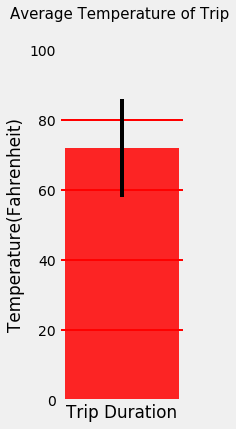

In [60]:
plt.figure(figsize=(2,6))
plt.bar(1,trip_dictionary['tavg'],yerr=yerr,align='center',color='red', alpha= .85)
plt.xticks([])
plt.ylim(0,100)
plt.ylabel("Temperature(Fahrenheit)")
plt.xlabel("Trip Duration")
plt.grid(color='r', linestyle='-', linewidth=2,)
plt.suptitle("Average Temperature of Trip", size = 15)
plt.show()

# # Step 2 - Climate App (w/ Flask)

In [100]:
#Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

#Use FLASK to create your routes.
from flask import Flask, json, jsonify
app = Flask(__name__)

#Routes
#Home page
#/
#List all routes that are available.
def Climate_App():
    """These are the available API routes"""
    return(
        f"Available Routes: <br/>"
        f"/api/v1.0/precipitation <br/>"
        f"/api/v1.0/stations <br/>"
        f"/api/v1.0/tobs <br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end>"
    )

#/api/v1.0/precipitation
#Convert the query results to a Dictionary using date as the key and prcp as the value.
#Return the JSON representation of your dictionary.

@app.route("/api/v1.0/precipitation")
def precipitation():
    """Query for the dates and temps for the last year"""

    precipitation_results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2017-01-01').all()

    all_precipitation = []
    for prcp in precipitation_results:
        prcp_dict = {}
        prcp_dict["Date"] = Measurement.date
        prcp_dict["TOBS"] = Measurement.tobs
        all_precipitation.append(prcp_dict) 
    return jsonify(all_precipitation)


#/api/v1.0/stations
#Return a JSON list of stations from the dataset.

@app.route("/api/v1.0/stations")
def stations():
    """Returns a list of stations from the dataset in JSON format"""
    
    station_results = session.query(Station.station).all()
    
    all_stations = list(np.ravel(station_results))
    
    return jsonify(all_stations)


#/api/v1.0/tobs

#query for the dates and temperature observations from a year from the last data point.
#Return a JSON list of Temperature Observations (tobs) for the previous year.

@app.route("/api/v1.0/tobs")
def tobs():
    """Returns a list of temperature observations from the last year in JSON format """
    
    
    tobs_results = session.query(Measurement.tobs).filter(Measurement.date > '2017-01-01').all()
    
    all_tobs = list(np.ravel(tobs_results))
    
    return jsonify(all_tobs)


if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\Users\osalvare\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
